In [1]:
# !pip install "wetland_v[lidar,raster,speed] @ git+https://github.com/JaweedNazary/wetland_v.git"

In [1]:
!git clone https://github.com/JaweedNazary/wetland_v
%cd wetland_v

C:\Users\jawee\Codes\GitHub\wetland_v\wetland_v


Cloning into 'wetland_v'...


In [2]:
!pip install -e ".[lidar,raster,speed]"

Obtaining file:///C:/Users/jawee/Codes/GitHub/wetland_v/wetland_v
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for wetland_v (pyproject.toml): started
  Building editable for wetland_v (pyproject.toml): finished with status 'done'
  Created wheel for wetland_v: filename=wetland_v-0.1.0-0.editable-py3-none-any.whl size=2957 sha256=006a0199feacced6e601c615902a573ca5729036a482809113138c4415786e6a
  Stored in directory: C:\Users\jawee\AppData\Local\Temp\pip-ephem-wheel-cache-u8hapuld\wheels\ed\f1\e0\675f672402dfe3466a465fffdee1

In [3]:
# Show project documentation
from IPython.display import Markdown, display
display(Markdown(open("README.md").read()))

# Suitability Model Notebook

This work was supported by the **U.S. Environmental Protection Agency (EPA)** under Grant No. **CD97790701**.  
Special thanks to the **University of Missouriâ€“Columbia** for technical support and collaboration.

## Author
**M. Jaweed Nazary**

## Project Information
- **Last Updated:** January 2026  
- **Version:** v0.0.1  

## License
**MIT License**  
Copyright Â© 2025 M. Jaweed Nazary

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files, to deal in the software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the software, subject to the conditions of the MIT License.

## Contact
- **M. Jaweed Nazary**  
- **Dr. Kathleen Trauth**  

**University of Missouriâ€“Columbia**  
Department of Civil and Environmental Engineering


In [4]:
from wetland_v.usgs_3dep import load_3dep_index
from wetland_v.crs import gcs_to_proj
from wetland_v.get_years import get_available_years
from wetland_v.lidar import get_lidar_points_around_geometry_3857
from wetland_v.plot import plot_lidar
from wetland_v.crawl_trace import Crawl_Trace



index = load_3dep_index()


In [ ]:
index.names
index.urls
index.counts
index.geometries_gcs
index.geometries_3857
# index.years_from_name_last4

In [1]:


xc = -92.2790255
yc = 38.9815258

point_geom = Point(xc, yc)
point_geom = gcs_to_proj(point_geom)
print(f'xc = {xc}, yc = {yc}')

xc = -92.2790255, yc = 38.9815258


In [2]:
point_geom.y

4719025.647314158

In [ ]:

index = load_3dep_index()
years = get_available_years(point_geom, index)
years

In [ ]:
import time

st = time.time()

pts = get_lidar_points_around_geometry_3857(
    point_geom,
    index,
    buffer_distance=500,
    res=1,
    out_name="las",
    prefer_year=2009,
)

et = time.time()

print(f"elapsed time = {et - st:.2f} sec")

g_points = pts.ground_xyz
v_points = pts.veg_xyz
w_points = pts.water_xyz
all_points = pts.all_xyz
r = pts.most_recent_year
e = pts.las_path


In [ ]:
g_points.T[2]

In [ ]:

fig = plot_lidar(pts, plot_vegetation= True)
fig.show()

In [4]:
import time
st = time.time()
# k +=5
location = (point_geom.x, point_geom.y)
p_gdf, l_gdf, sampled_points = Crawl_Trace(location, 
                        N = 100, 
                        min_height=0.10, 
                        max_height = 20.0, 
                        window_size = (50, 5), 
                        D = 25, 
                        r = 20,  
                        resolution = 5.0,
                        method = 1, random_seed = 59, sigma = 1.0)


et = time.time()
print(f' elapsed time = {et - st:0.2f} sec')

Crawling on the landscape...
Tracing features of interest...
Tracing  ▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃  feature 100 out of 100.00,     100.00 %Crawling and tracing processes are successfully compeleted.
 elapsed time = 46.57 sec


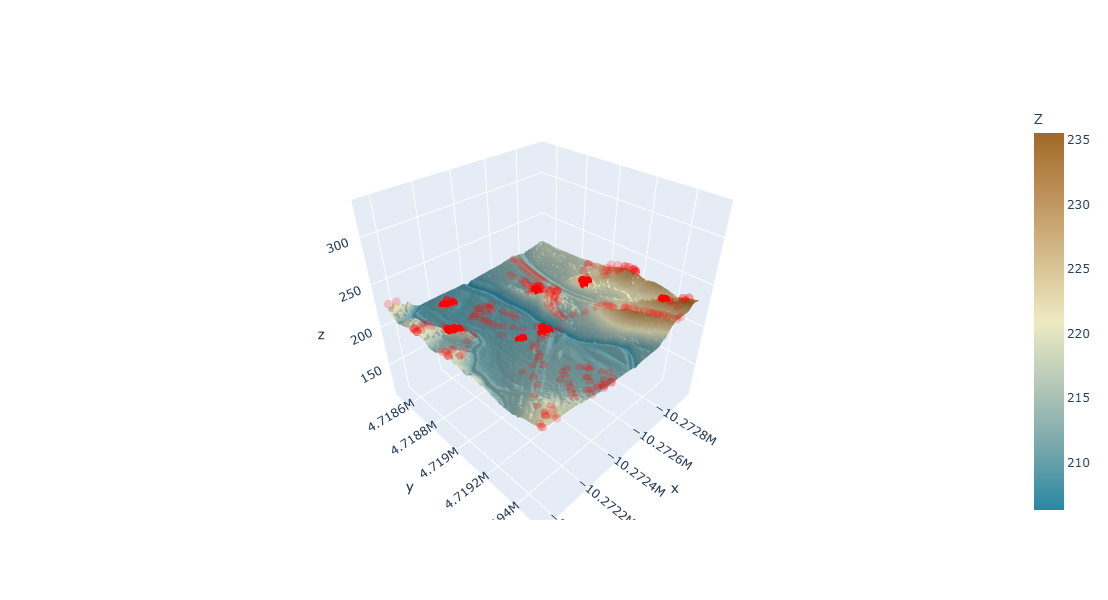

In [9]:
from wetland_v.plot import plot_features

fig = plot_features(sampled_points, p_gdf, method = 1, color = "red")
fig.show()

In [6]:
st = time.time()
# k +=5
location = (point_geom.x, point_geom.y)
p_gdf_channel, l_gdf, sampled_points = Crawl_Trace(location, 
                        N = 100, 
                        min_height=0.10, 
                        max_height = 20.0, 
                        window_size = (50, 5), 
                        D = 25, 
                        r = 20,  
                        resolution = 5.0,
                        method = 2, random_seed = 59, sigma = 1.0)


et = time.time()
print(f' elapsed time = {et - st:0.2f} sec')

Crawling on the landscape...
Tracing features of interest...
Tracing  ▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃  feature 100 out of 100.00,     100.00 %Crawling and tracing processes are successfully compeleted.
 elapsed time = 31.43 sec


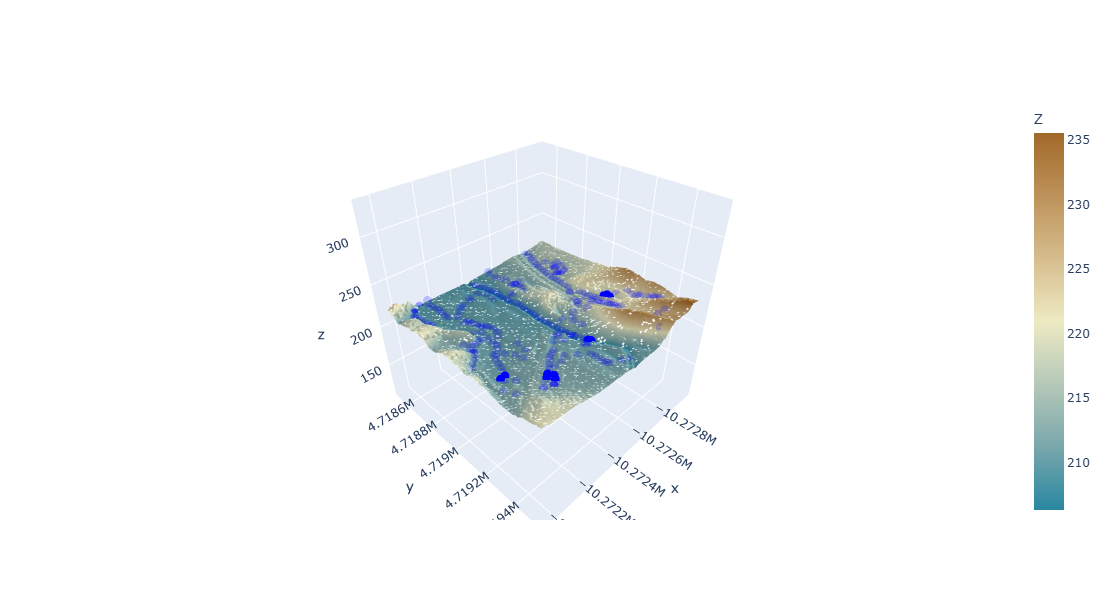

In [8]:
fig = plot_features(sampled_points, p_gdf_channel, method = 2, color = "blue")
fig.show()